In [9]:
import sys
sys.path.append('../..')
from consecution import Node, Pipeline, GlobalState
import random
import pandas as pd
import numpy as np
import scipy as scp
from scipy import stats
from collections import namedtuple
import datetime
import copy
from dateutil.parser import parse
import seaborn as sns
import pylab as pl
%matplotlib inline


In [31]:
class Dummy(Node):
    def process(self, item):
        self.push(item)
D = Dummy

In [46]:
top_node = Dummy('top_node')
net_agg = Dummy('net_agg')
in_agg = Dummy('in_agg')
out_agg = Dummy('out_agg')
in_report = Dummy('in_report')
out_report = Dummy('out_report')
report = Dummy('report')
filler1 = Dummy('route')
filler2 = Dummy('filler2')
filler3 = Dummy('filler3')

def router(item):
    return 'in_agg'

# pipe = Pipeline(
#     top_node | [
#         in_agg | in_report,
#         out_agg | out_report,
#         router
#         ] | net_report
# )


# pipe = Pipeline(
#     top_node | [
#         filler1 | [in_agg, out_agg, router],
#         net_agg
#         ] | report
# )

# time amount



In [58]:
starting = parse('1/1/2015')
n_days = 365*2
one_day = datetime.timedelta(days=1)
df = pd.DataFrame(
    [
        (starting + nn * one_day, round(1000 * np.random.randn(), 2))
        for nn in range(n_days)], columns=['date', 'cash_flow'])
df.head(10)

,date,cash_flow
0,2015-01-01,892.81
1,2015-01-02,-876.08
2,2015-01-03,-824.65
3,2015-01-04,1019.25
4,2015-01-05,-1060.95
5,2015-01-06,728.47
6,2015-01-07,-1572.61
7,2015-01-08,1243.08
8,2015-01-09,254.12
9,2015-01-10,111.55


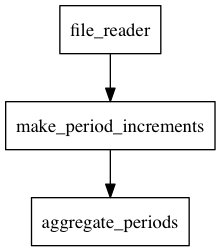

In [61]:
pipe = Pipeline(
    D('file_reader') | D('make_period_increments')| D('aggregate_periods')
)
pipe.plot(display_noteook=True)

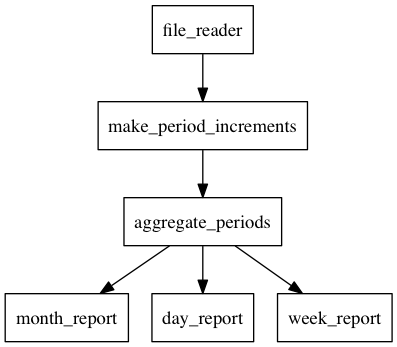

In [62]:
pipe = Pipeline(
    D('file_reader') | D('make_period_increments')| D('aggregate_periods')
    | [D('day_report'), D('week_report'), D('month_report')]
)




pipe.plot(display_noteook=True)

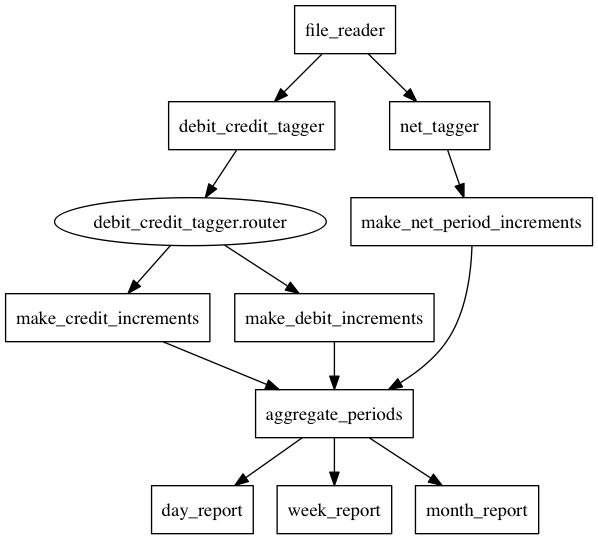

In [63]:
pipe = Pipeline(
    D('file_reader')
    | [
         D('net_tagger') | D('make_net_period_increments')
        ,D('debit_credit_tagger') | [
             D('make_debit_increments')
            ,D('make_credit_increments')
            ,router]
      ]
    | D('aggregate_periods')
    | [D('day_report'), D('week_report'), D('month_report')]
     
)




pipe.plot(display_noteook=True)